# List 1 of Machine Learning Course

## Introduction

This notebook is part of the Machine Learning course and aims to build a classification or clustering model using the Polish companies bankruptcy dataset. The notebook covers various steps including data loading, cleaning, standardization, outlier detection, and dimensionality reduction. Different methods such as Z-score, Isolation Forest, PCA, and LLE are applied to preprocess the data. Finally, a RandomForest classifier is trained and evaluated using different preprocessing techniques to compare their effectiveness.

**The goal** of the task is to build a classification or clustering model. In order to achieve this, it is necessary to carefully study the content of the collection, process it and analyse it for use in modelling.

Dataset: [Polish companies bankruptcy](https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data)

**Additional teaching materials:**

1. Outliers detection:
   1. Z-Score
   2. Isolation Forest
       - https://dataheroes.ai/blog/outlier-detection-methods-every-data-enthusiast-must-know/
       - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest
2. Dimensionality reduction method LEE (Local Linear Embedding):
   - https://medium.com/analytics-vidhya/locally-linear-embedding-lle-data-mining-b956616d24e9
   - https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html
3. Random Forest Classifier:
      - https://www.ibm.com/topics/random-forest,
      - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
4. Metrics - MCC and confusion matrix:
      - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
      - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html#sklearn.metrics.matthews_corrcoef

## Imports

In [1]:
from scipy.io import arff

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
import seaborn as sns

from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, matthews_corrcoef

## Data Loading

In [2]:
file = '2year.arff'
data, info = arff.loadarff(file)
data_df = pd.DataFrame(data)
display(data_df.shape)
data_df.head()

(10173, 65)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.202350,0.46500,0.240380,1.5171,-14.547,0.510690,0.25366,0.91816,1.15190,0.42695,...,0.13184,0.473950,0.86816,0.00024,8.5487,5.16550,107.740,3.38790,5.3440,b'0'
1,0.030073,0.59563,0.186680,1.3382,-37.859,-0.000319,0.04167,0.67890,0.32356,0.40437,...,0.12146,0.074369,0.87235,0.00000,1.5264,0.63305,622.660,0.58619,1.2381,b'0'
2,0.257860,0.29949,0.665190,3.2211,71.799,0.000000,0.31877,2.33200,1.67620,0.69841,...,0.16499,0.369210,0.81614,0.00000,4.3325,3.19850,65.215,5.59690,47.4660,b'0'
3,0.227160,0.67850,0.042784,1.0828,-88.212,0.000000,0.28505,0.47384,1.32410,0.32150,...,0.29358,0.706570,0.78617,0.48456,5.2309,5.06750,142.460,2.56210,3.0066,b'0'
4,0.085443,0.38039,0.359230,1.9444,21.731,0.187900,0.10823,1.37140,1.11260,0.52167,...,0.10124,0.163790,0.89876,0.00000,5.7035,4.00200,89.058,4.09840,5.9874,b'0'


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10173 entries, 0 to 10172
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10172 non-null  float64
 1   Attr2   10172 non-null  float64
 2   Attr3   10172 non-null  float64
 3   Attr4   10151 non-null  float64
 4   Attr5   10149 non-null  float64
 5   Attr6   10172 non-null  float64
 6   Attr7   10172 non-null  float64
 7   Attr8   10155 non-null  float64
 8   Attr9   10169 non-null  float64
 9   Attr10  10172 non-null  float64
 10  Attr11  10172 non-null  float64
 11  Attr12  10151 non-null  float64
 12  Attr13  10110 non-null  float64
 13  Attr14  10172 non-null  float64
 14  Attr15  10161 non-null  float64
 15  Attr16  10154 non-null  float64
 16  Attr17  10155 non-null  float64
 17  Attr18  10172 non-null  float64
 18  Attr19  10109 non-null  float64
 19  Attr20  10110 non-null  float64
 20  Attr21  7009 non-null   float64
 21  Attr22  10172 non-null  float64
 22

In [4]:
data_df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,10172.000000,10172.000000,10172.000000,10151.000000,10149.000000,10172.000000,10172.000000,10155.000000,10169.000000,10172.000000,...,1.017200e+04,10110.000000,10171.000000,10134.000000,10171.000000,9630.000000,10157.000000,1.011000e+04,10151.000000,9961.000000
mean,0.043074,0.646960,0.070861,4.144058,-144.830797,-0.111564,0.122101,9.868798,2.867541,0.344341,...,6.080925e+03,-1.128949,-0.043519,12.656337,3.034738,375.332514,16.884020,8.910799e+02,11.217653,55.275877
std,1.112028,6.615405,6.606495,51.715242,7811.976260,6.568088,6.532490,288.386870,96.674595,6.655844,...,6.598007e+04,86.502920,12.251651,632.937400,238.185655,12294.315980,295.762312,4.366133e+04,233.919213,1526.588333
min,-75.331000,0.000000,-479.960000,0.002079,-438250.000000,-508.410000,-75.331000,-1.594500,-0.612590,-479.910000,...,-1.805200e+06,-8534.600000,-979.250000,-4.549700,-189.580000,0.000000,-0.007521,-9.921400e+02,-0.367890,-10677.000000
25%,0.000364,0.277695,0.012114,1.029200,-50.131000,0.000000,0.001975,0.393635,1.026300,0.277365,...,5.699975e+00,0.010381,0.009959,0.872130,0.000000,5.684275,4.695300,4.028225e+01,3.102200,2.310900
50%,0.049493,0.487335,0.189695,1.524400,-1.907500,0.000000,0.060057,1.005400,1.285700,0.490925,...,8.326700e+02,0.055013,0.126210,0.949715,0.004849,10.353500,6.988600,6.964550e+01,5.198900,4.536000
75%,0.141105,0.705040,0.400400,2.741100,51.443000,0.074739,0.165865,2.518850,2.256600,0.703280,...,4.020250e+03,0.134068,0.309135,0.993390,0.249240,22.163500,11.073000,1.163200e+02,9.012550,10.604000
max,7.372700,480.960000,5.502200,4881.600000,70686.000000,35.551000,649.230000,18554.000000,9742.300000,74.434000,...,3.657400e+06,20.200000,147.190000,59672.000000,23853.000000,639940.000000,26862.000000,4.144800e+06,23454.000000,127680.000000


In [5]:
data_df['class'].value_counts()

class
b'0'    9773
b'1'     400
Name: count, dtype: int64

## Data cleaning

### Null cleaning

In [6]:
data_df.isnull().sum()

Attr1       1
Attr2       1
Attr3       1
Attr4      22
Attr5      24
         ... 
Attr61     16
Attr62     63
Attr63     22
Attr64    212
class       0
Length: 65, dtype: int64

In [7]:
data_df.isnull().sum().nlargest(10)

Attr37    4518
Attr21    3164
Attr27     706
Attr60     543
Attr45     541
Attr24     225
Attr28     212
Attr53     212
Attr54     212
Attr64     212
dtype: int64

In [8]:
data_df.nunique()

Attr1     9669
Attr2     9528
Attr3     9641
Attr4     9075
Attr5     9853
          ... 
Attr61    9420
Attr62    9359
Attr63    9432
Attr64    9361
class        2
Length: 65, dtype: int64

<Axes: >

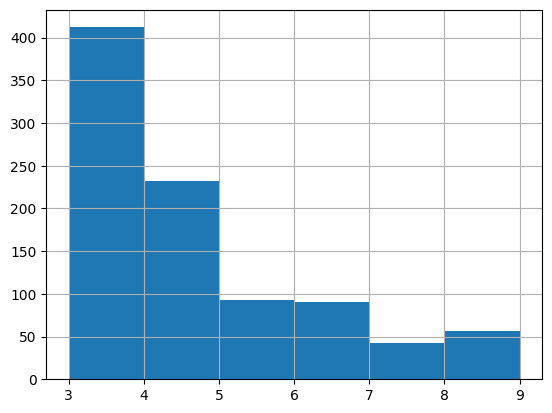

In [9]:
data_df.isnull().sum(axis=1).hist(bins=range(3, 10))

In the graph above, it can be seen that the rows with more than 6 missing rows are relatively few compared to the total data in the set. The limit of these 10% missing was considered sufficient to consider the data as ‘uncomfortable’.

In [10]:
(data_df.isnull().sum(axis=1) >= 6).sum()

269

In [11]:
data_df.isnull().sum(axis=1).nlargest(10)

7356    36
4569    35
7271    35
7325    35
9228    35
4200    33
8504    33
1832    30
2583    28
7979    25
dtype: int64

In [12]:
df_cleaned = data_df.dropna(thresh=data_df.shape[1] - 5)
df_cleaned

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.202350,0.46500,0.240380,1.51710,-14.54700,0.510690,0.253660,0.918160,1.15190,0.426950,...,0.131840,0.473950,0.86816,0.000240,8.5487,5.16550,107.740,3.38790,5.3440,b'0'
1,0.030073,0.59563,0.186680,1.33820,-37.85900,-0.000319,0.041670,0.678900,0.32356,0.404370,...,0.121460,0.074369,0.87235,0.000000,1.5264,0.63305,622.660,0.58619,1.2381,b'0'
2,0.257860,0.29949,0.665190,3.22110,71.79900,0.000000,0.318770,2.332000,1.67620,0.698410,...,0.164990,0.369210,0.81614,0.000000,4.3325,3.19850,65.215,5.59690,47.4660,b'0'
3,0.227160,0.67850,0.042784,1.08280,-88.21200,0.000000,0.285050,0.473840,1.32410,0.321500,...,0.293580,0.706570,0.78617,0.484560,5.2309,5.06750,142.460,2.56210,3.0066,b'0'
4,0.085443,0.38039,0.359230,1.94440,21.73100,0.187900,0.108230,1.371400,1.11260,0.521670,...,0.101240,0.163790,0.89876,0.000000,5.7035,4.00200,89.058,4.09840,5.9874,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10168,0.029970,0.66806,0.066243,1.11030,-105.55000,0.029970,0.038888,0.482740,1.02920,0.322500,...,0.028377,0.092931,0.97162,0.209820,3.0914,3.94560,192.220,1.89880,3.4199,b'1'
10169,0.012843,0.49306,-0.160620,0.61898,-24.80100,0.012843,0.012843,0.905900,1.01450,0.446660,...,0.014247,0.028752,0.98575,0.160090,48.6660,63.75200,40.071,9.10870,5.1956,b'1'
10170,0.015092,0.55759,-0.284600,0.48599,-85.57100,0.015092,0.009826,0.694880,1.00600,0.387460,...,0.005971,0.038950,0.99403,0.010091,15.0530,11.96400,114.250,3.19480,2.4201,b'1'
10171,-0.002554,0.47076,0.424010,1.90070,0.95483,-0.002554,0.001785,1.114400,0.99293,0.524640,...,-0.007122,-0.004869,1.00710,0.000000,6.4289,5.70250,64.291,5.67730,25.3990,b'1'


We were able to remove 269 rows that had a minimum of 6 columns missing.

In [13]:
df_cleaned.isnull().sum().nlargest(10)

Attr37    4283
Attr21    2919
Attr27     598
Attr60     419
Attr45     417
Attr24     210
Attr41     162
Attr32      57
Attr47      44
Attr52      44
dtype: int64

As can also be seen from the two significantly missing columns, deficiencies of more than 30% were considered sufficient for the values to be removed.

In [14]:
df_cleaned2 = df_cleaned.drop(columns=['Attr37', 'Attr21'])
df_cleaned2

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.202350,0.46500,0.240380,1.51710,-14.54700,0.510690,0.253660,0.918160,1.15190,0.426950,...,0.131840,0.473950,0.86816,0.000240,8.5487,5.16550,107.740,3.38790,5.3440,b'0'
1,0.030073,0.59563,0.186680,1.33820,-37.85900,-0.000319,0.041670,0.678900,0.32356,0.404370,...,0.121460,0.074369,0.87235,0.000000,1.5264,0.63305,622.660,0.58619,1.2381,b'0'
2,0.257860,0.29949,0.665190,3.22110,71.79900,0.000000,0.318770,2.332000,1.67620,0.698410,...,0.164990,0.369210,0.81614,0.000000,4.3325,3.19850,65.215,5.59690,47.4660,b'0'
3,0.227160,0.67850,0.042784,1.08280,-88.21200,0.000000,0.285050,0.473840,1.32410,0.321500,...,0.293580,0.706570,0.78617,0.484560,5.2309,5.06750,142.460,2.56210,3.0066,b'0'
4,0.085443,0.38039,0.359230,1.94440,21.73100,0.187900,0.108230,1.371400,1.11260,0.521670,...,0.101240,0.163790,0.89876,0.000000,5.7035,4.00200,89.058,4.09840,5.9874,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10168,0.029970,0.66806,0.066243,1.11030,-105.55000,0.029970,0.038888,0.482740,1.02920,0.322500,...,0.028377,0.092931,0.97162,0.209820,3.0914,3.94560,192.220,1.89880,3.4199,b'1'
10169,0.012843,0.49306,-0.160620,0.61898,-24.80100,0.012843,0.012843,0.905900,1.01450,0.446660,...,0.014247,0.028752,0.98575,0.160090,48.6660,63.75200,40.071,9.10870,5.1956,b'1'
10170,0.015092,0.55759,-0.284600,0.48599,-85.57100,0.015092,0.009826,0.694880,1.00600,0.387460,...,0.005971,0.038950,0.99403,0.010091,15.0530,11.96400,114.250,3.19480,2.4201,b'1'
10171,-0.002554,0.47076,0.424010,1.90070,0.95483,-0.002554,0.001785,1.114400,0.99293,0.524640,...,-0.007122,-0.004869,1.00710,0.000000,6.4289,5.70250,64.291,5.67730,25.3990,b'1'


The remaining `null` values will be replaced by the average value of the column for the corresponding class.

In [15]:
df_cleaned3 = df_cleaned2.copy()
df_cleaned3.iloc[:, :] = df_cleaned3.groupby('class').apply(lambda i: i.fillna(i.mean()))

C:\Users\dawir\AppData\Local\Temp\ipykernel_16692\2566713506.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_cleaned3.iloc[:, :] = df_cleaned3.groupby('class').apply(lambda i: i.fillna(i.mean()))


**The y** data is ‘nice’ and has therefore been separated at the start and will not be processed, apart from converting the binary notation to integer {0, 1}.

In [16]:
y_df = pd.DataFrame(df_cleaned3.pop('class'))
y_df = y_df.astype(int)
y_df.head()

,class
0,0
1,0
2,0
3,0
4,0


### Standardisation

Standardisation was used because it does not disturb outliers and handles them better.

In [17]:
scaled_values = StandardScaler().fit_transform(df_cleaned3.values)
df_scaled = pd.DataFrame(scaled_values, index=df_cleaned3.index, columns=df_cleaned3.columns)
df_scaled.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,9904.000000,9.904000e+03,9904.000000,9.904000e+03,9.904000e+03,9.904000e+03,9.904000e+03,9.904000e+03,9.904000e+03,9.904000e+03,...,9.904000e+03,9.904000e+03,9904.000000,9.904000e+03,9.904000e+03,9.904000e+03,9.904000e+03,9904.000000,9.904000e+03,9.904000e+03
mean,0.000000,9.183105e-17,0.000000,-3.264307e-17,-2.152290e-18,-8.609161e-18,-1.793575e-18,3.587150e-18,-6.098156e-18,-5.452468e-17,...,6.456871e-18,-7.174301e-19,0.000000,1.004402e-17,-3.587150e-19,-7.174301e-18,-7.174301e-18,0.000000,7.533016e-18,1.004402e-17
std,1.000050,1.000050e+00,1.000050,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,...,1.000050e+00,1.000050e+00,1.000050,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050,1.000050e+00,1.000050e+00
min,-30.445607,-1.257266e+00,-36.359200,-2.323786e-01,-7.615592e+01,-3.241195e+01,-1.066578e+00,-1.876610e-01,-2.868613e-02,-3.319133e+01,...,-2.731398e+01,-9.764410e+01,-79.020520,-7.642471e-02,-7.983578e-01,-3.135665e-02,-5.538333e-02,-0.041596,-4.792457e-02,-1.282298e+01
25%,-0.287611,-5.909505e-01,-0.413220,-1.581347e-01,3.105112e-03,-3.400283e-02,-2.202324e-02,-1.151211e-01,-1.817411e-02,-4.108197e-01,...,-9.167943e-02,1.334824e-02,0.003729,-1.431730e-02,-1.290008e-02,-3.087185e-02,-3.944928e-02,-0.017439,-3.311625e-02,-4.816410e-02
50%,-0.069201,-9.582225e-02,0.019179,-1.229062e-01,1.145550e-02,-3.400283e-02,-1.314988e-02,-9.327436e-02,-1.558603e-02,8.589134e-02,...,-7.814013e-02,1.385657e-02,0.013163,-1.343919e-02,-1.286516e-02,-3.045907e-02,-3.185779e-02,-0.016750,-2.437815e-02,-4.549946e-02
75%,0.335041,4.120120e-01,0.528658,-3.709154e-02,2.058248e-02,1.349828e-01,3.042773e-03,-3.886003e-02,-5.852831e-03,5.817502e-01,...,-2.904964e-02,1.474989e-02,0.027724,-1.294203e-02,-1.182272e-02,-2.920448e-02,-1.827671e-02,-0.015668,-8.491226e-03,-3.819942e-02
max,13.465307,3.325204e+01,2.016869,5.646140e+01,1.229712e+01,3.141886e+01,9.944679e+01,5.802876e+01,9.950294e+01,1.294203e+00,...,5.506146e+01,2.443656e-01,11.880751,9.775090e+01,9.881357e+01,5.275884e+01,8.984373e+01,96.922442,9.913627e+01,8.411620e+01


## Analysis of outliers

The **Box plots** are a good way to look at the data in the context of detecting outliers. They show large cases in an easy and clear way.

Attr1        Axes(0.125,0.83;0.133621x0.05)
Attr2     Axes(0.285345,0.83;0.133621x0.05)
Attr3      Axes(0.44569,0.83;0.133621x0.05)
Attr4     Axes(0.606034,0.83;0.133621x0.05)
Attr5     Axes(0.766379,0.83;0.133621x0.05)
                        ...                
Attr60     Axes(0.44569,0.17;0.133621x0.05)
Attr61    Axes(0.606034,0.17;0.133621x0.05)
Attr62    Axes(0.766379,0.17;0.133621x0.05)
Attr63       Axes(0.125,0.11;0.133621x0.05)
Attr64    Axes(0.285345,0.11;0.133621x0.05)
Length: 62, dtype: object

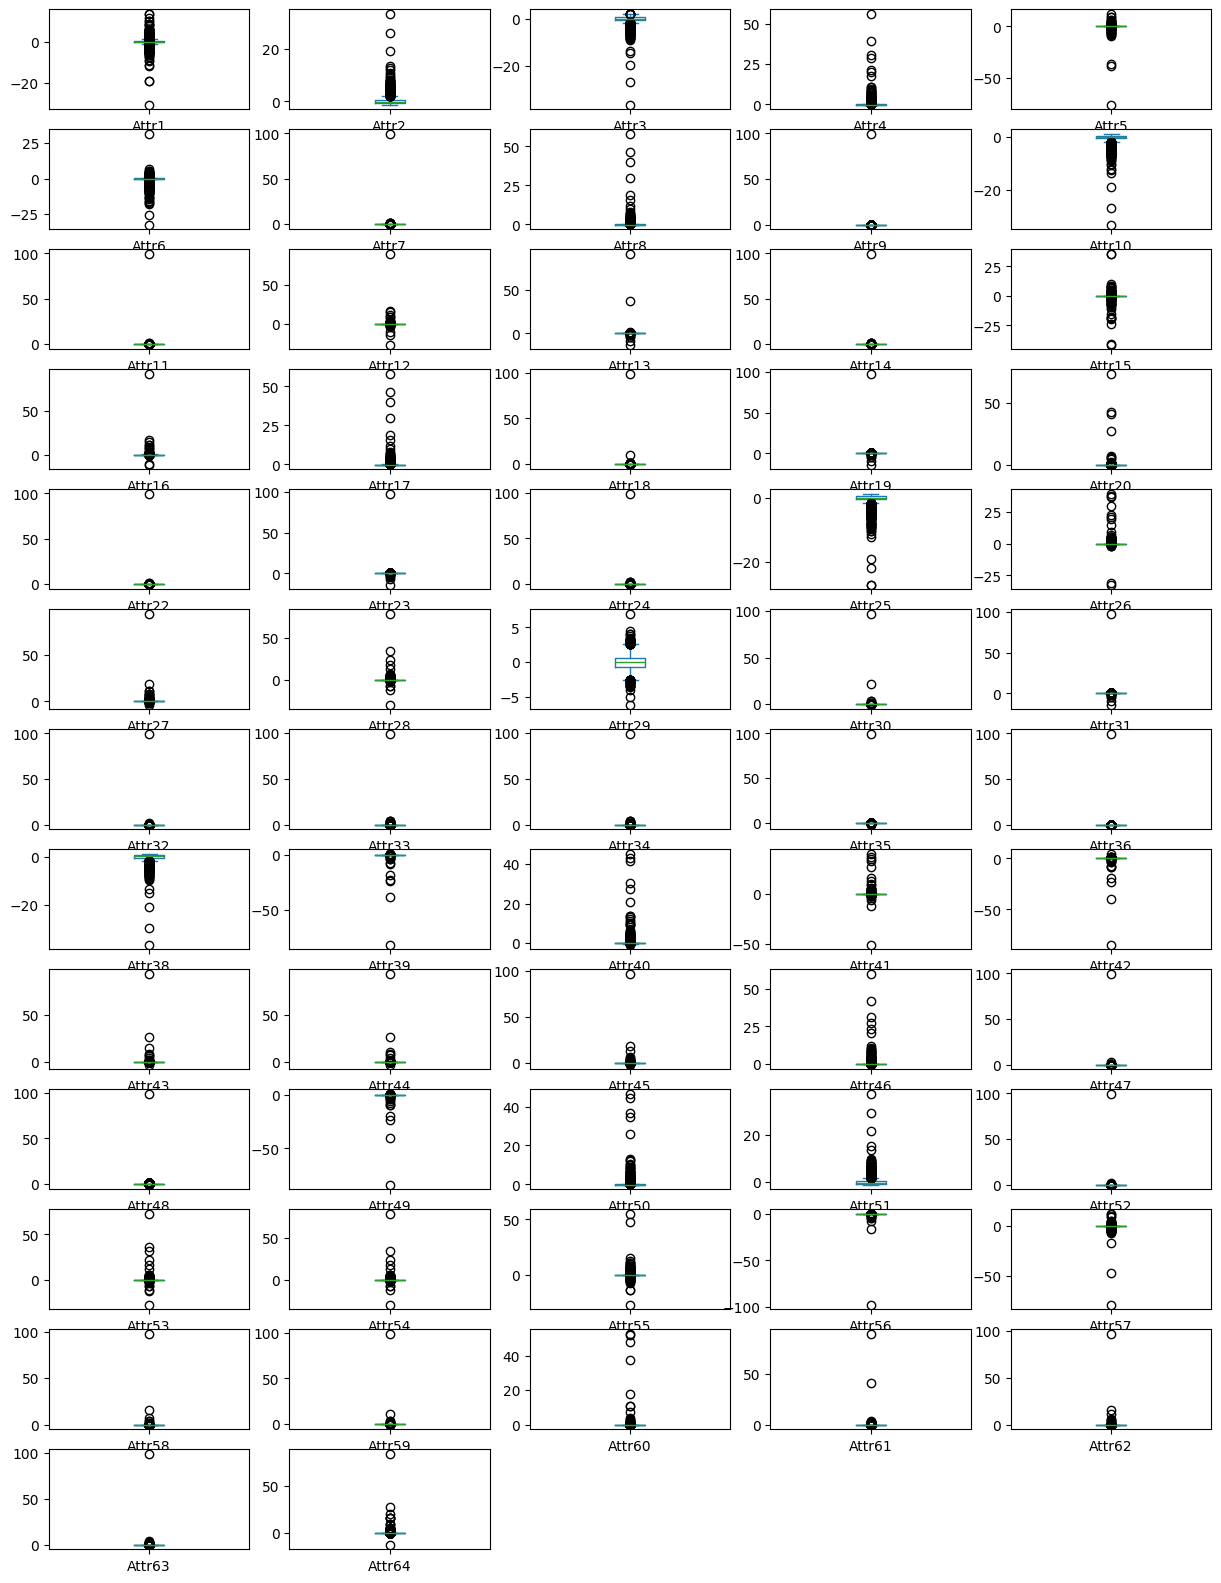

In [18]:
df_scaled.plot(kind='box', subplots=True,layout=(13,5),figsize=(15,20))

Attr63       Axes(0.125,0.11;0.352273x0.77)
Attr9     Axes(0.547727,0.11;0.352273x0.77)
dtype: object

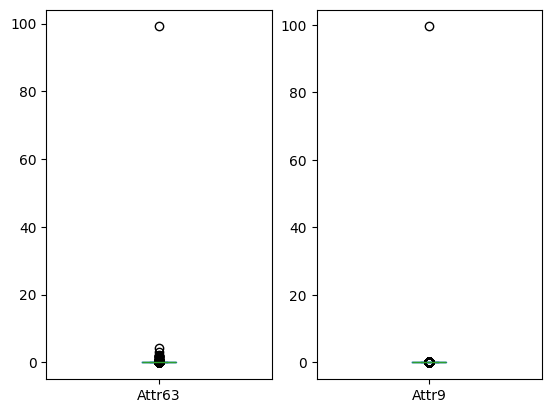

In [19]:
df_scaled[['Attr63', 'Attr9']].plot(kind='box', subplots=True,layout=(1,2))

### Z-score approach

In [20]:
original_shape = df_scaled.shape
z_scores = np.abs(zscore(df_scaled))
outliers_id = np.array(z_scores > 3).any(axis=1)

no_outliers_z_x = df_scaled[~outliers_id]
no_outliers_z_y = y_df[~outliers_id]

display(no_outliers_z_x.shape)
display(no_outliers_z_y.shape)
print(f"Deleted {original_shape[0] - no_outliers_z_x.shape[0]} outliers")

(9292, 62)

(9292, 1)

Deleted 612 outliers


Attr63       Axes(0.125,0.11;0.352273x0.77)
Attr9     Axes(0.547727,0.11;0.352273x0.77)
dtype: object

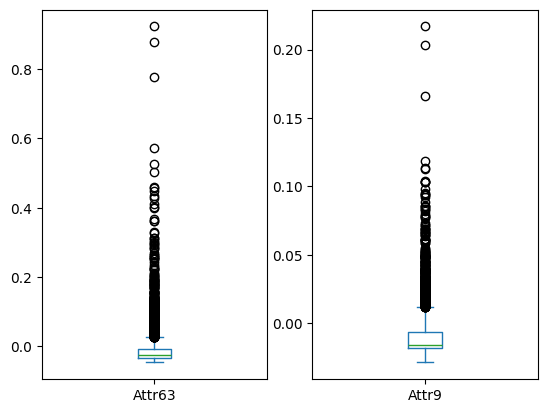

In [21]:
no_outliers_z_x[['Attr63', 'Attr9']].plot(kind='box', subplots=True,layout=(1,2))

After the outliers have been cut off, the data are still highly dispersed; however, a significant reduction in the scale of the y-axis in the graphs can be seen.

### Isolation Forest approach

In [22]:
original_shape = df_scaled.shape

isolation_forest = IsolationForest(random_state=42, contamination=0.1)
outliers = isolation_forest.fit_predict(df_scaled)

no_outliers_if_x = df_scaled[outliers == 1]
no_outliers_if_y = y_df[outliers == 1]
display(no_outliers_if_x.shape)
display(no_outliers_if_y.shape)
print(f"Deleted {original_shape[0] - no_outliers_if_x.shape[0]} outliers")

(8913, 62)

(8913, 1)

Deleted 991 outliers


## Dimension reduction

In [23]:
reduction_factor = 0.95

### PCA

In [24]:
initial_z_pca = PCA()
initial_z_pca.fit(no_outliers_z_x)
initial_z_pca.explained_variance_ratio_

array([4.82585033e-01, 2.01615047e-01, 8.65872596e-02, 4.73104410e-02,
       4.01914954e-02, 3.14835105e-02, 2.63746500e-02, 1.67894651e-02,
       1.37565388e-02, 8.45892482e-03, 6.95984895e-03, 6.91898584e-03,
       4.74337114e-03, 4.08336959e-03, 3.37650293e-03, 3.04099660e-03,
       1.89544706e-03, 1.81960528e-03, 1.71162394e-03, 1.31259030e-03,
       1.27001072e-03, 1.23034183e-03, 1.21245324e-03, 1.05040924e-03,
       8.16172487e-04, 6.95529262e-04, 6.31962272e-04, 3.78594429e-04,
       3.27534749e-04, 2.94083619e-04, 1.97125028e-04, 1.52416555e-04,
       1.36502662e-04, 1.15410894e-04, 1.11551875e-04, 8.49689538e-05,
       6.18033332e-05, 4.39077059e-05, 4.26898582e-05, 3.12873844e-05,
       1.96113788e-05, 1.48543069e-05, 1.16016257e-05, 1.06914683e-05,
       8.96533668e-06, 8.00404253e-06, 6.08969621e-06, 4.80137647e-06,
       4.24175365e-06, 3.38061931e-06, 2.94883298e-06, 2.35060860e-06,
       1.44058631e-06, 8.89993752e-07, 3.42802397e-07, 2.51113978e-07,
      

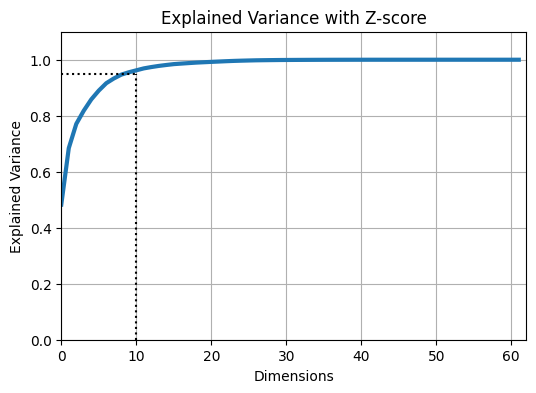

Z-score achieves more than 0.95% of the variance for 10 dimensions


In [25]:
# source: https://github.com/ageron/handson-ml2/blob/master/08_dimensionality_reduction.ipynb

cumsum = np.cumsum(initial_z_pca.explained_variance_ratio_)
d = np.argmax(cumsum >= reduction_factor) + 1

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 62, 0, 1.1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, reduction_factor], "k:")
plt.plot([0, d], [reduction_factor, reduction_factor], "k:")
plt.grid(True)
plt.title("Explained Variance with Z-score")
plt.show()
print(f"Z-score achieves more than {reduction_factor}% of the variance for {d} dimensions")

The graph shows the so-called *elbow*, which shows for how many dimensions the variance growth slows down.

In [26]:
initial_if_pca = PCA()
initial_if_pca.fit(no_outliers_if_x)
initial_if_pca.explained_variance_ratio_

array([1.83180031e-01, 1.00471081e-01, 9.26033993e-02, 9.03460663e-02,
       8.28244580e-02, 8.16151907e-02, 7.91088316e-02, 6.37297301e-02,
       4.83486834e-02, 3.78709887e-02, 3.46194979e-02, 3.20766702e-02,
       2.14346566e-02, 1.65037973e-02, 1.24497625e-02, 7.30054211e-03,
       6.90913431e-03, 3.43236184e-03, 1.75147305e-03, 7.84419547e-04,
       7.04950036e-04, 4.25964505e-04, 3.26829231e-04, 3.13367856e-04,
       2.14627113e-04, 1.65557233e-04, 1.50267958e-04, 8.25631056e-05,
       6.97789407e-05, 5.37885816e-05, 4.40017381e-05, 2.53058830e-05,
       1.26652332e-05, 1.16918728e-05, 7.56889985e-06, 7.53543754e-06,
       5.23636396e-06, 4.63744758e-06, 2.39012685e-06, 2.32415932e-06,
       2.00136940e-06, 1.72468589e-06, 1.47263433e-06, 8.71954551e-07,
       6.00064609e-07, 4.84814631e-07, 3.86960548e-07, 2.42827964e-07,
       1.13914607e-07, 9.41883512e-08, 6.66963625e-08, 3.53279342e-08,
       3.11475724e-08, 2.21726544e-08, 1.33752216e-08, 6.05001054e-09,
      

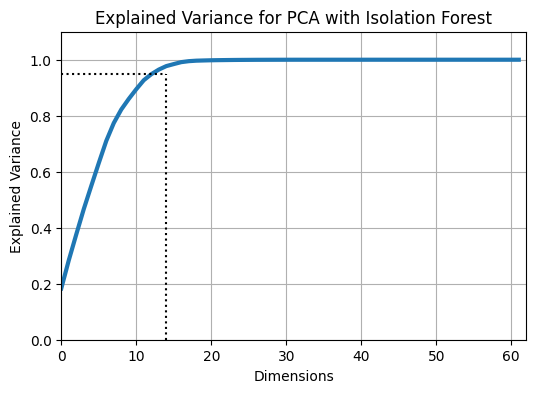

Isolation Forest achieves more than 0.95% variance for 14 dimensions


In [27]:
# source: https://github.com/ageron/handson-ml2/blob/master/08_dimensionality_reduction.ipynb

cumsum = np.cumsum(initial_if_pca.explained_variance_ratio_)
d = np.argmax(cumsum >= reduction_factor) + 1

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 62, 0, 1.1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, reduction_factor], "k:")
plt.plot([0, d], [reduction_factor, reduction_factor], "k:")
plt.grid(True)
plt.title("Explained Variance for PCA with Isolation Forest")
plt.show()
print(f"Isolation Forest achieves more than {reduction_factor}% variance for {d} dimensions")

In [28]:
z_pca = PCA(n_components=reduction_factor, random_state=42)
X_df_z_pca = z_pca.fit_transform(no_outliers_z_x)

In [29]:
if_pca = PCA(n_components=reduction_factor, random_state=42)
X_df_if_pca = if_pca.fit_transform(no_outliers_if_x)

It was decided to choose a value of 95% for the breakdown of the data because it corresponds to the inflection point of the variance growth trend.

In [30]:
X_df_z_pca.shape[1]

10

### Locally Linear Embedding Algorithm

In [31]:
z_lle = LocallyLinearEmbedding(n_neighbors=10, n_components=X_df_z_pca.shape[1],
                               random_state=42)
X_df_z_lle = z_lle.fit_transform(no_outliers_z_x)
X_df_z_lle.shape

(9292, 10)

As this method forces the number of components to be given, it was decided to choose the quantities obtained in the PCA method, as appropriate for the ‘type’ of data.

In [32]:
if_lle = LocallyLinearEmbedding(n_neighbors=10, n_components=X_df_if_pca.shape[1],
                                random_state=42)
X_df_if_lle = if_lle.fit_transform(no_outliers_if_x)
X_df_if_lle.shape

(8913, 14)

## RandomForest training

**The big classification problem in this data is the imbalance in labels. We definitely have more labels of 0. A way to combat this could be techniques such as over sampling or under sampling.**

In [33]:
no_outliers_z_y.value_counts()

class
0        8940
1         352
Name: count, dtype: int64

In [34]:
results = {}  # dictionary to store results

### Z-score PCA

Accuracy dla Z-score PCA: 0.9623453469607316
MCC dla Z-score PCA: 0.07970778426734455


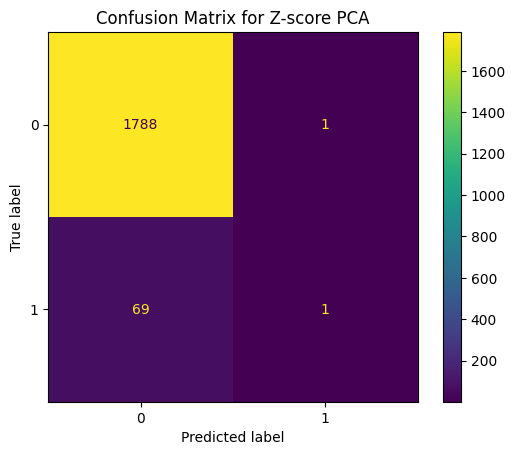

In [35]:
X_train_z_pca, X_test_z_pca, y_train_z_pca, y_test_z_pca = train_test_split(X_df_z_pca, no_outliers_z_y, test_size=0.2,
                                                                            random_state=42, stratify=no_outliers_z_y)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_z_pca, y_train_z_pca.values.ravel())
y_pred_z_pca = rfc.predict(X_test_z_pca)
acc_z_pca = accuracy_score(y_test_z_pca, y_pred_z_pca)
mcc_z_pca = abs(matthews_corrcoef(y_test_z_pca, y_pred_z_pca))
cm_z_pca = confusion_matrix(y_test_z_pca, y_pred_z_pca)
print(f"Accuracy dla Z-score PCA: {acc_z_pca}")
print(f"MCC dla Z-score PCA: {mcc_z_pca}")
ConfusionMatrixDisplay(cm_z_pca).plot()
plt.title("Confusion Matrix for Z-score PCA")
plt.show()

results['Z-score PCA'] = {'Accuracy': acc_z_pca, 'MCC': mcc_z_pca, 'Confusion Matrix': cm_z_pca}

### Isolation Forest PCA

Accuracy for Isolation Forest PCA: 0.9584969153112731
MCC for Isolation Forest PCA: 0.012405272221550759


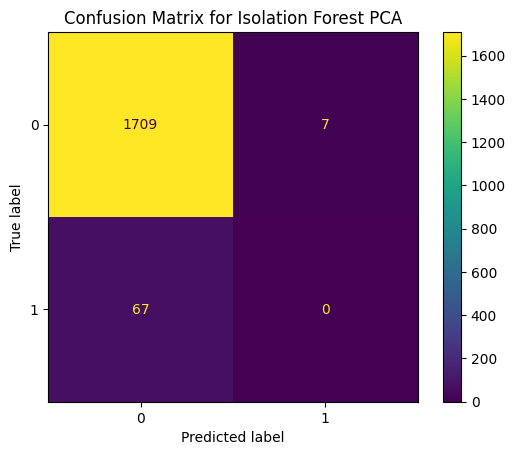

In [36]:
X_train_if_pca, X_test_if_pca, y_train_if_pca, y_test_if_pca = train_test_split(X_df_if_pca, no_outliers_if_y, test_size=0.2,
                                                                                random_state=42, stratify=no_outliers_if_y)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_if_pca, y_train_if_pca.values.ravel())
y_pred_if_pca = rfc.predict(X_test_if_pca)
acc_if_pca = accuracy_score(y_test_if_pca, y_pred_if_pca)
mcc_if_pca = abs(matthews_corrcoef(y_test_if_pca, y_pred_if_pca))
cm_if_pca = confusion_matrix(y_test_if_pca, y_pred_if_pca)
print(f"Accuracy for Isolation Forest PCA: {acc_if_pca}")
print(f"MCC for Isolation Forest PCA: {abs(mcc_if_pca)}")
ConfusionMatrixDisplay(cm_if_pca).plot()
plt.title("Confusion Matrix for Isolation Forest PCA")
plt.show()

results['Isolation Forest PCA'] = {'Accuracy': acc_if_pca, 'MCC': mcc_if_pca, 'Confusion Matrix': cm_if_pca}

### Z-Score LLE

Accuracy for Z-Score LLE: 0.9623453469607316
MCC for Z-Score LLE: 0.07970778426734455


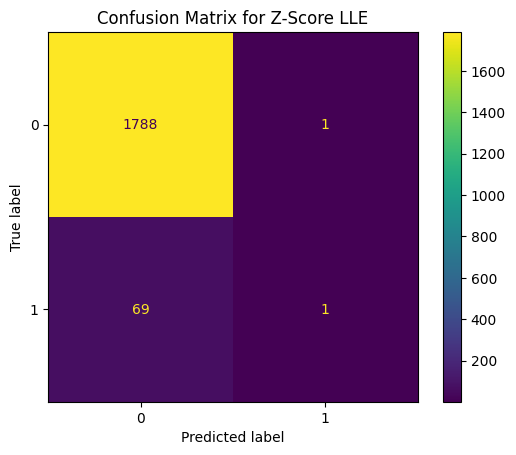

In [37]:
X_train_z_lle, X_test_z_lle, y_train_z_lle, y_test_z_lle = train_test_split(X_df_z_lle, no_outliers_z_y, test_size=0.2,
                                                                            random_state=42, stratify=no_outliers_z_y)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_z_lle, y_train_z_lle.values.ravel())
y_pred_z_lle = rfc.predict(X_test_z_lle)
acc_z_lle = accuracy_score(y_test_z_lle, y_pred_z_lle)
mcc_z_lle = abs(matthews_corrcoef(y_test_z_lle, y_pred_z_lle))
cm_z_lle = confusion_matrix(y_test_z_lle, y_pred_z_lle)
print(f"Accuracy for Z-Score LLE: {acc_z_lle}")
print(f"MCC for Z-Score LLE: {mcc_z_lle}")
ConfusionMatrixDisplay(cm_z_lle).plot()
plt.title("Confusion Matrix for Z-Score LLE")
plt.show()

results['Z-score LLE'] = {'Accuracy': acc_z_lle, 'MCC': mcc_z_lle, 'Confusion Matrix': cm_z_lle}

### Isolation Forest LLE

Accuracy for Isolation Forest LLE: 0.9579360628154795
MCC for Isolation Forest LLE: 0.013265529031339186


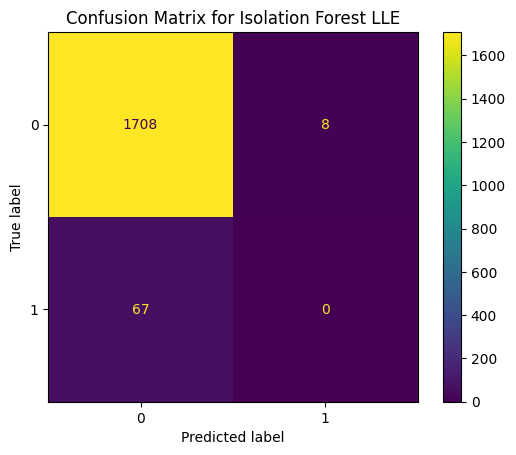

In [38]:
X_train_if_lle, X_test_if_lle, y_train_if_lle, y_test_if_lle = train_test_split(X_df_if_lle, no_outliers_if_y, test_size=0.2,
                                                                                random_state=42, stratify=no_outliers_if_y)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_if_lle, y_train_if_lle.values.ravel())
y_pred_if_lle = rfc.predict(X_test_if_lle)
acc_if_lle = accuracy_score(y_test_if_lle, y_pred_if_lle)
mcc_if_lle = abs(matthews_corrcoef(y_test_if_lle, y_pred_if_lle))
cm_if_lle = confusion_matrix(y_test_if_lle, y_pred_if_lle)
print(f"Accuracy for Isolation Forest LLE: {acc_if_lle}")
print(f"MCC for Isolation Forest LLE: {mcc_if_lle}")
ConfusionMatrixDisplay(cm_if_lle).plot()
plt.title("Confusion Matrix for Isolation Forest LLE")
plt.show()

results['Isolation Forest LLE'] = {'Accuracy': acc_if_lle, 'MCC': mcc_if_lle, 'Confusion Matrix': cm_if_lle}

### Data not fully processed

In order to ultimately compare and be able to look at the effectiveness of each method used, models will also be learned for the data from the ‘intermediate’ stages.

In [39]:
def train_rfc(X_df_tmp, y_df_tmp):
    X_train_tmp, X_test_tmp, y_train_tmp, y_test_tmp = train_test_split(X_df_tmp, y_df_tmp, test_size=0.2,
                                                                        random_state=42, stratify=y_df_tmp)

    rfc = RandomForestClassifier(random_state=42)
    rfc.fit(X_train_tmp, y_train_tmp.values.ravel())
    y_pred_tmp= rfc.predict(X_test_tmp)
    acc_tmp = accuracy_score(y_test_tmp, y_pred_tmp)
    mcc_tmp = abs(matthews_corrcoef(y_test_tmp, y_pred_tmp))
    cm_tmp = confusion_matrix(y_test_tmp, y_pred_tmp)

    return {'Accuracy': acc_tmp, 'MCC': mcc_tmp, 'Confusion Matrix': cm_tmp}

In [40]:
# Standardized results
results['Standardized'] = train_rfc(df_scaled, y_df)

In [41]:
# Z-score results
results['Z-score'] = train_rfc(no_outliers_z_x, no_outliers_z_y)

In [42]:
# Isolation Forest results
results['Isolation Forest'] = train_rfc(no_outliers_if_x, no_outliers_if_y)

In [43]:
# PCA results
pca = PCA(n_components=0.9, random_state=42)
X_df_pca = pca.fit_transform(df_scaled)
results['PCA Standardized'] = train_rfc(X_df_pca, y_df)

In [44]:
# LLE results
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=len(X_df_pca[0]), random_state=42)
X_df_lle = lle.fit_transform(df_scaled)
results['LLE Standardized'] = train_rfc(X_df_lle, y_df)

## Comparison

Due to the characteristics of the data, we will consider MCC as the most important measure of quality and therefore the final results will be sorted by its value.

In [45]:
display(pd.DataFrame(results).T.sort_values(by='MCC', ascending=False))

,Accuracy,MCC,Confusion Matrix
Z-score,0.973642,0.545185,"[[1785, 4], [45, 25]]"
Isolation Forest,0.971957,0.496506,"[[1715, 1], [49, 18]]"
Standardized,0.970217,0.496251,"[[1896, 8], [51, 26]]"
Z-score PCA,0.962345,0.079708,"[[1788, 1], [69, 1]]"
Z-score LLE,0.962345,0.079708,"[[1788, 1], [69, 1]]"
Isolation Forest LLE,0.957936,0.013266,"[[1708, 8], [67, 0]]"
Isolation Forest PCA,0.958497,0.012405,"[[1709, 7], [67, 0]]"
PCA Standardized,0.958607,0.010116,"[[1899, 5], [77, 0]]"
LLE Standardized,0.958607,0.010116,"[[1899, 5], [77, 0]]"


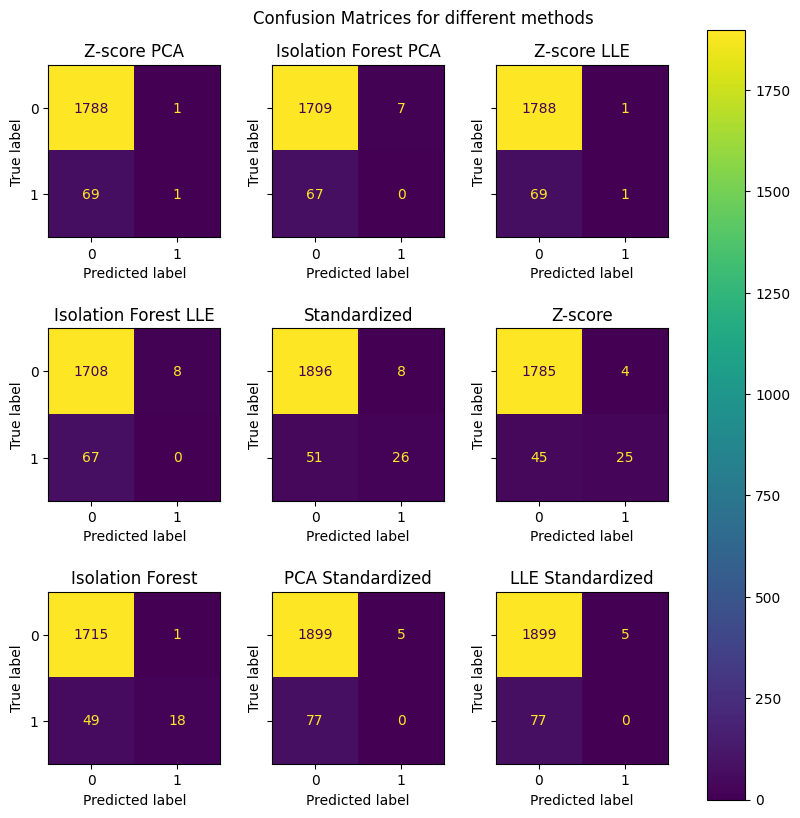

In [46]:
f, axes = plt.subplots(3, 3, figsize=(10, 10), sharey='row')
for i, (key, values) in enumerate(results.items()):
    disp = ConfusionMatrixDisplay(values['Confusion Matrix'])
    disp.plot(ax=axes[i // 3, i % 3])
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.30, hspace=0.08)

f.suptitle("Confusion Matrices for different methods", y=0.9)
f.colorbar(disp.im_, ax=axes)
plt.show()

From the results, it can be seen that the dimensionality reduction methods significantly worsened the results, this may be blamed on the imbalance in the data and the blurring of the **decision boundary** with the removal of dimensions.

The outlier removal methods resulted in improved results, of the two approaches used the *Z-Score* method was better.

An MCC value above 0.5 is considered satisfactory. It all depends on the nature of the problem one wishes to focus on. Manipulation of the hyperparameters of the model itself and the data processing methods could improve the results.


In [47]:
# The best score but with weighted classes
X_train_tmp, X_test_tmp, y_train_tmp, y_test_tmp = train_test_split(no_outliers_z_x, no_outliers_z_y, test_size=0.2,
                                                                    random_state=42, stratify=no_outliers_z_y)

rfc = RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 2})
rfc.fit(X_train_tmp, y_train_tmp.values.ravel())
y_pred_tmp= rfc.predict(X_test_tmp)
acc_tmp = accuracy_score(y_test_tmp, y_pred_tmp)
mcc_tmp = abs(matthews_corrcoef(y_test_tmp, y_pred_tmp))
cm_tmp = confusion_matrix(y_test_tmp, y_pred_tmp)

display(pd.DataFrame({"Weighted Z-score": {'Accuracy': acc_tmp, 'MCC': mcc_tmp, 'Confusion Matrix': cm_tmp}}))

,Weighted Z-score
Accuracy,0.973642
MCC,0.542867
Confusion Matrix,"[[1786, 3], [46, 24]]"


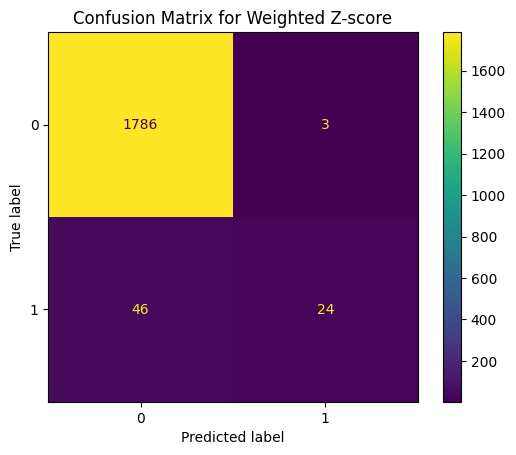

In [48]:
ConfusionMatrixDisplay(cm_tmp).plot()
plt.title("Confusion Matrix for Weighted Z-score")
plt.show()